In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 30
plt.rcParams['lines.linewidth'] = 4
#plt.rcParams['xtick.labelbottom'] = False
#plt.rcParams['xtick.bottom'] = False

In [174]:
def plot(label, index, start,end, title, ylabel, ylim1, ylim2):
    
    ws = [5]#[1,2,3,4,5] 
    mVs = []

    for w in ws:
        f = np.load("../outputs/data/under_homog_exp/long_longtest_k_1_n_20_mlp_depth_1_width_"+ str(w) + "_online_False.npz")
        mVs.append( f[label])

    colors = plt.cm.jet(np.linspace(0.2,0.8,len(ws)))
    for i,w in enumerate(ws):
        meanV = np.mean(mVs[i], axis = 0)[start:]
        stdV = np.std(mVs[i], axis = 0)[start:]

        plt.errorbar(range(start, meanV.shape[0]+start), meanV, yerr = stdV, color = colors[i], label= str(w), alpha = 0.5)
    plt.title(title)
    plt.legend(title="width")
    plt.ylabel(ylabel)
    plt.xlabel("Time")
    plt.show()

    #
    for j in range(20):
        plt.plot(range(start, end), mVs[index][j, start:end], alpha = 0.6)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Time")
    plt.ylim(bottom=ylim1, top=ylim2)
    plt.show()
    

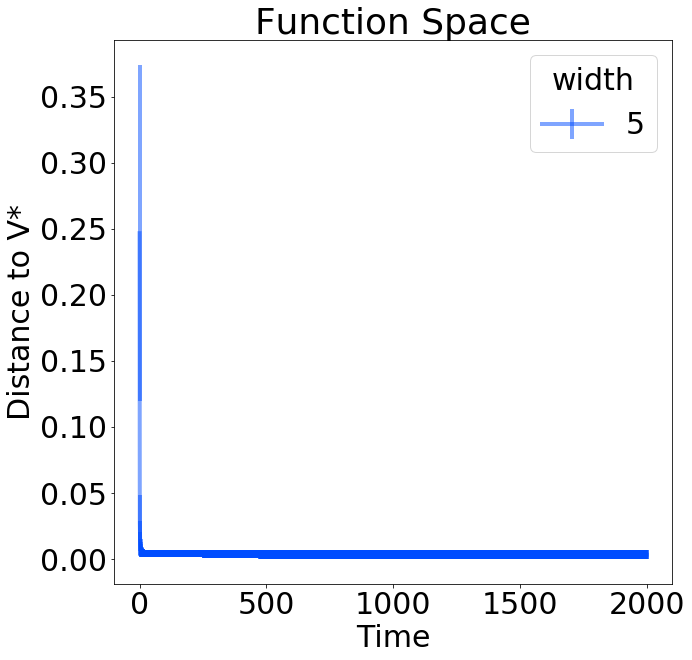

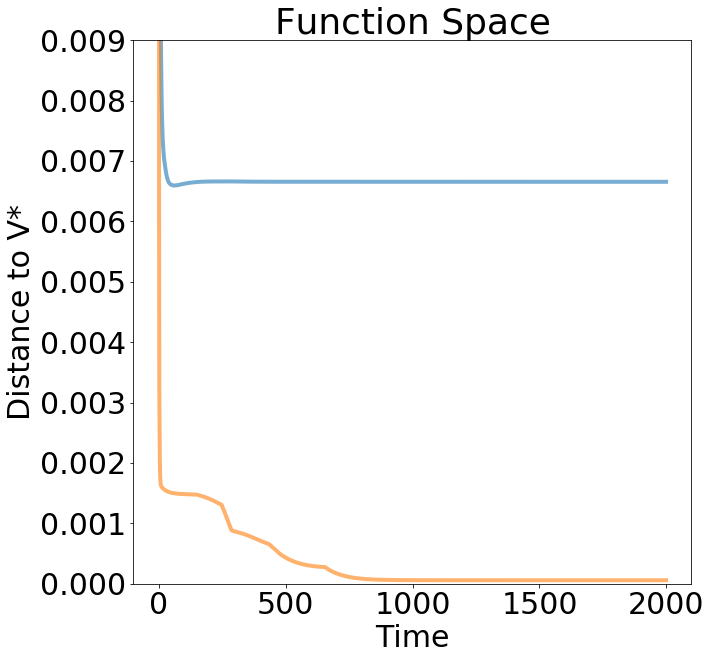

In [175]:
plot("mlp_Vs", 0, 0, 2000, "Function Space", "Distance to V*", 0, .009)

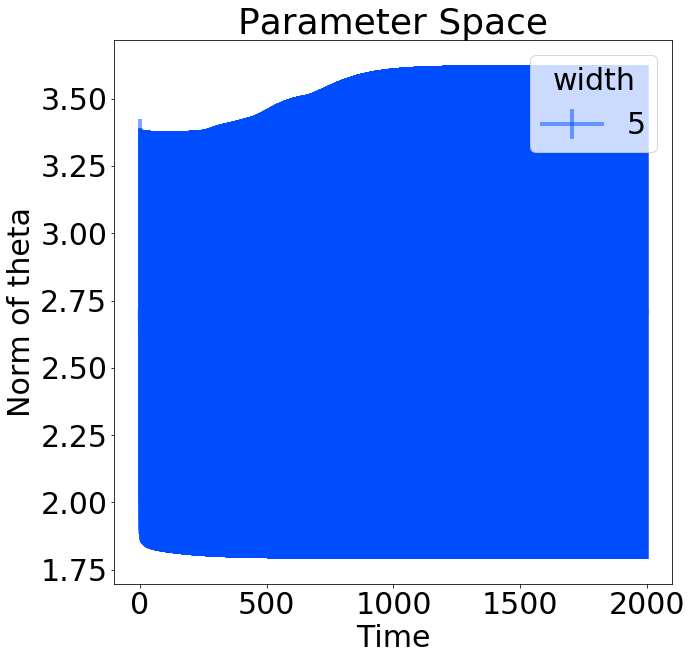

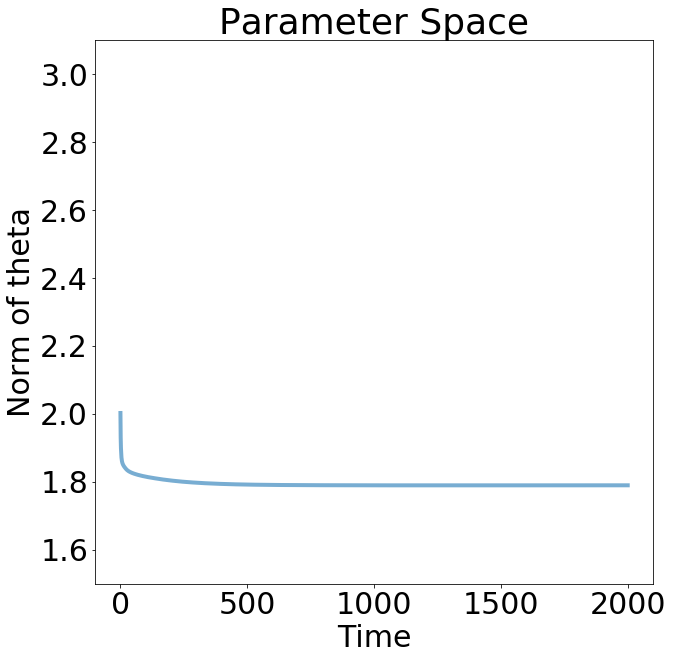

In [176]:
plot("params", 0, 0, 2000, "Parameter Space", "Norm of theta", 1.5, 3.1)

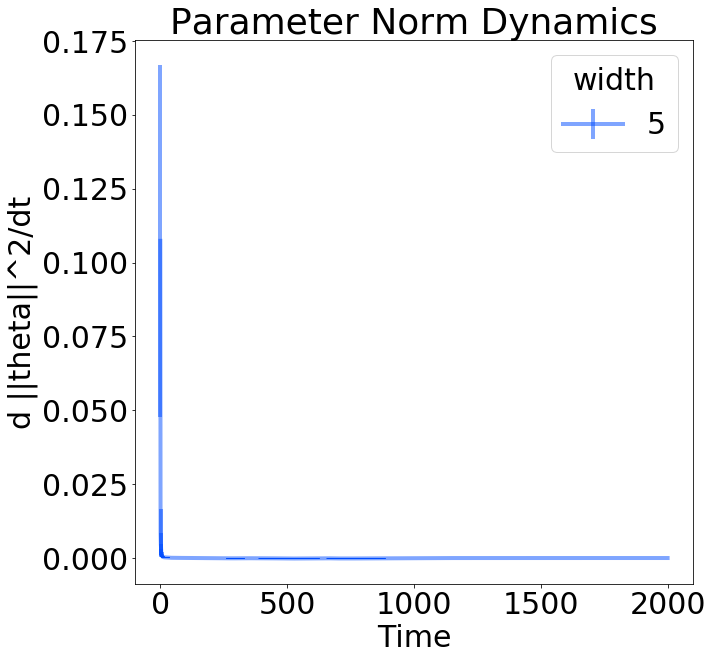

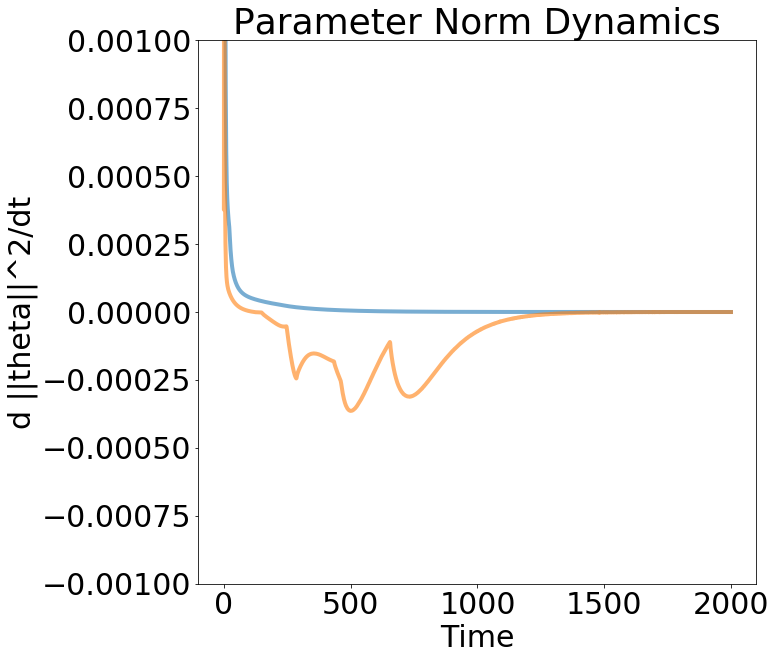

In [184]:
plot("dynamics", 0, 0, 2000, "Parameter Norm Dynamics", "d ||theta||^2/dt", -.001, .001)

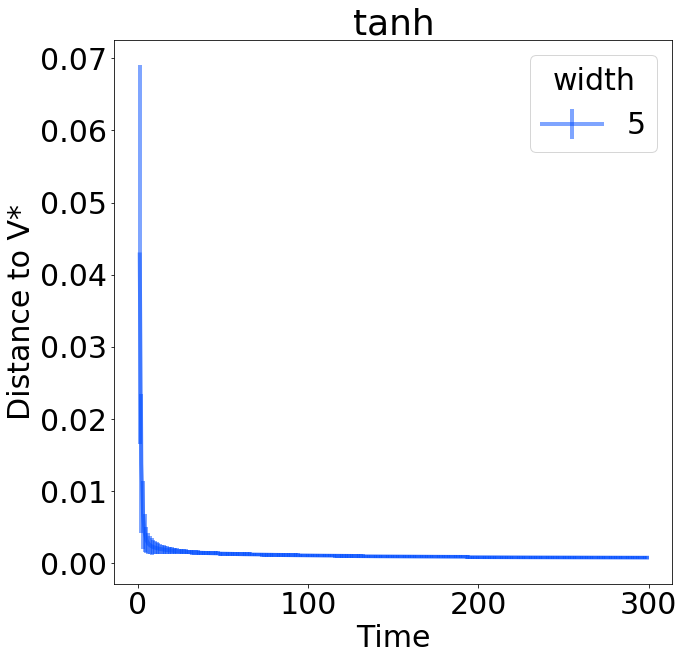

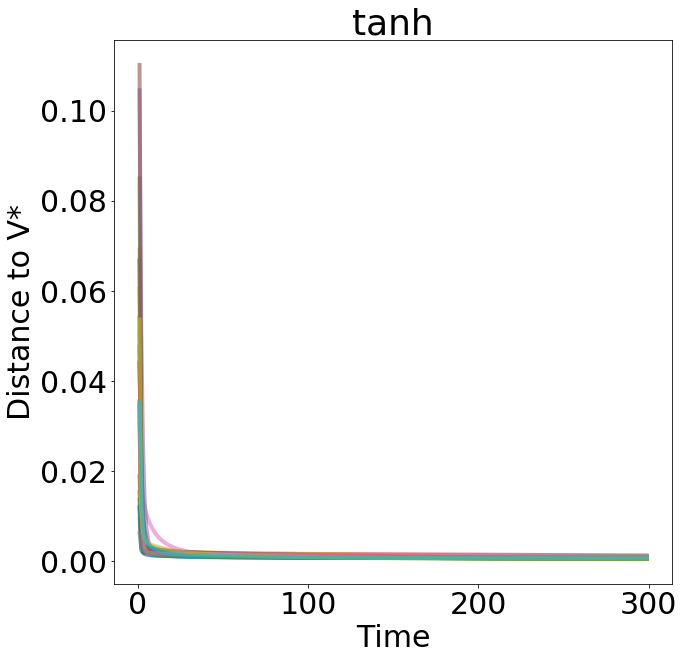

In [16]:
plot("tanh_mlp_Vs", 0, 1, "tanh", "Distance to V*")

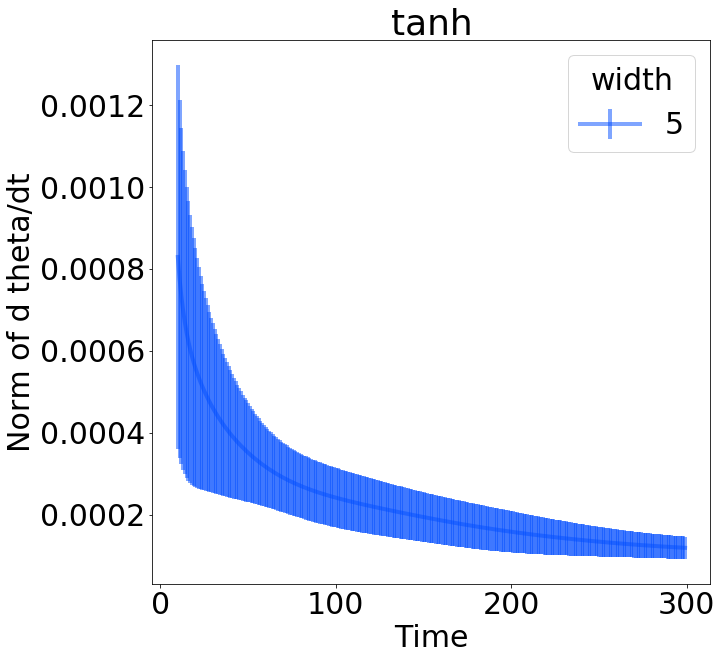

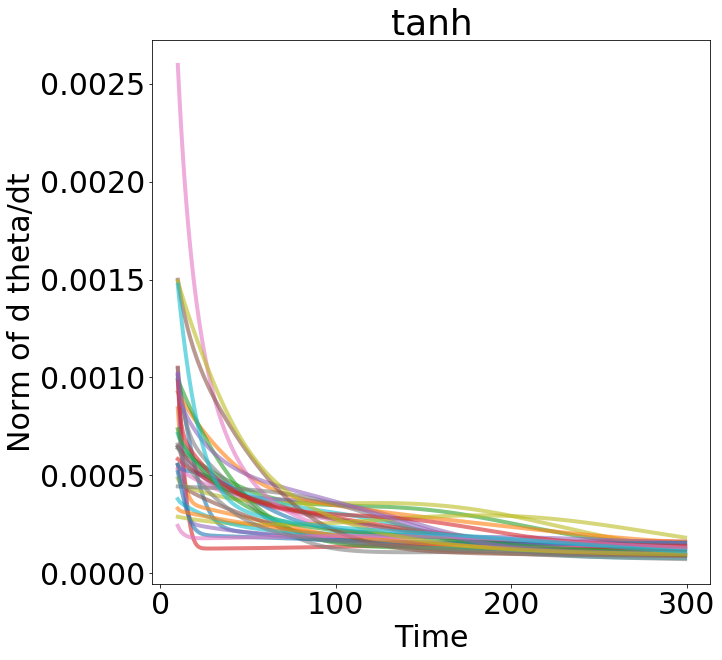

In [19]:
plot("tanh_dynamics", 0, 10, "tanh", "Norm of d theta/dt")

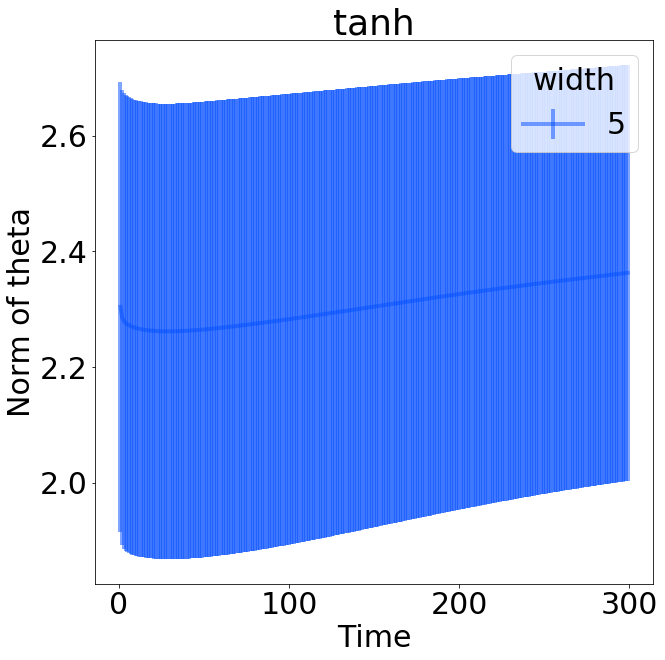

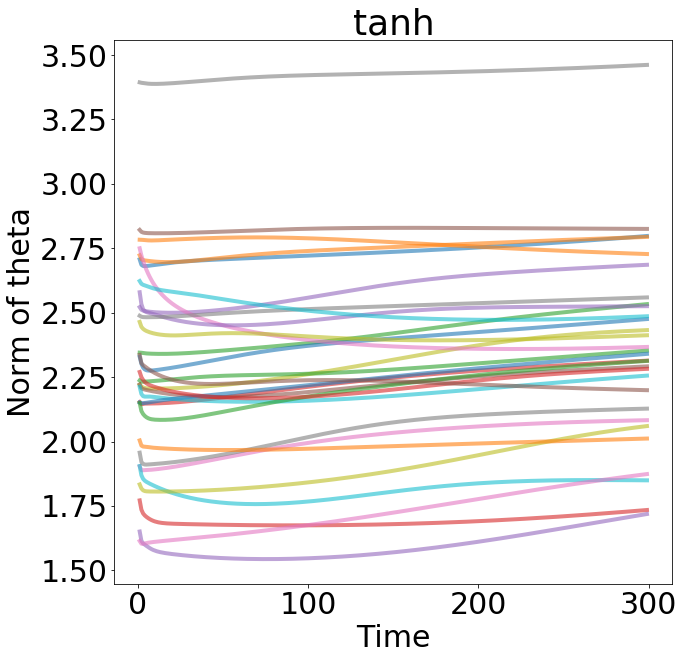

In [18]:
plot("tanh_params", 0, 1, "tanh", "Norm of theta")